# Problem set 1-Computational Physics.
# Matheus Azevedo Silva Pessôa, ID: 260889844

### Problem 1 
We saw in class how Taylor series/roundoff errors fight against
each other when deciding how big a step size to use when calculating numerical
derivatives. If we allow ourselves to evaluate our function f at four points (x ± δ
and x ± 2δ).

-  what should our estimate of the first derivative at x be? Rather than doing
a complicated fit, I suggest thinking about how to combine the derivative from
x ± δ with the derivative from x ± 2δ to cancel the next term in the Taylor
series.


- Now that you have your operator for the derivative, what should δ be in
terms of the machine precision and various properties of the function? Show for
f (x) = exp(x) and f (x) = exp(0.01x) that your estimate of the optimal δ is at
least roughly correct.

In [3]:
# Code for problem 1
#Defining the derivative in function of the first and second order terms in the Taylor expansion

import numpy as np 
import matplotlib.pyplot as plt
from scipy import interpolate
import random 

def deriv(f,x,h):
    f_prime = (8*f(x+h)-8*f(x-h)-f(x+2*h)+f(x-2*h))/(12*h)
    return f_prime

#Testing for different values. First, np.exp with epsilon=1E-15.
deriv(np.exp,np.linspace(0,5),1E-15)

array([  1.07321559,   1.11022302,   1.22124533,   1.31376391,
         1.57281595,   1.66533454,   1.90588286,   1.96139401,
         2.18343862,   2.73855013,   3.21964677,   3.44169138,
         3.92278802,   4.36687723,   5.10702591,   5.62512999,
         5.99520433,   6.36527867,   7.40148683,   8.36368012,
         6.66133815,   6.36527867,   8.28966525,   9.02981393,
         9.91799235,  10.65814104,  11.25025998,  13.02661682,
        12.43449788,  16.5793305 ,  15.98721155,  19.83598471,
        21.0202226 ,  22.50051997,  26.05323364,  29.60594732,
        32.56654206,  35.52713679,  39.07985047,  46.18527782,
        53.29070518,  56.84341886,  63.94884622,  71.05427358,
        78.15970093,  93.55479354,  99.47598301, 106.58141036,
       130.26616822, 146.84549872])

In [4]:
f = lambda x: x*np.exp(x)
deriv(f,np.linspace(0,5),1E-15)

array([  1.        ,   1.22240181,   1.47104551,   1.77635684,
         2.18343862,   2.49800181,   3.01610588,   3.40468394,
         3.94129174,   5.21804822,   6.40228611,   7.32747196,
         8.80776933,  10.14003696,  11.99040867,  13.98881011,
        15.69115208,  17.31947918,  20.13204418,  24.12884707,
        19.83598471,  21.0202226 ,  26.64535259,  31.67836364,
        34.93501784,  34.93501784,  42.0404452 ,  49.14587256,
        45.59315888,  66.317322  ,  63.94884622,  78.15970093,
        91.18631776,  95.92326933, 117.2395514 , 129.08193033,
       137.37159558, 165.79330501, 180.00415973, 222.63672387,
       270.00623959, 279.48014273, 341.06051316, 364.74527102,
       426.32564146, 516.32772132, 568.43418861, 634.75151061,
       748.43834833, 881.07299234])

In [ ]:
#The second item is in the LaTeX file! Thanks.

### Problem 2

Lakeshore 670 diodes (successors to the venerable Lakeshore
470) are temperature-sensitive diodes used for a range of cryogenic temperature
measurements. They are fed with a constant 10 μA current, and the voltage is
read out. Lakeshore provides a chart that converts voltage to temperature, avail-
able at https://www.lakeshore.com/products/categories/specification/temperature-products/cryogenic-temperature-sensors/dt-670-silicon-diodes, or you can look
at the text file I’ve helpfully copied and pasted (lakeshore.txt). Write a routine
that will take an arbitrary voltage and interpolate to return a temperature. You
should also make some sort of quantitative (but possibly rough) estimate of the
error in your interpolation as well.

In [5]:
#Code for problem 2.
#Some important libraries!
import numpy as np 
import matplotlib.pyplot as plt
from scipy import interpolate
import random 

In [6]:
#Opening datapoints from lakeshore.txt.
#Taking voltage and temperature data in order to test the interpolation. However, it is better to work with a list
#so I can sort it and put it into the spline command, since they need to be sorted out.
#Here I also take a random value in the range of the first and last elements of voltage because we will use them 
#afterwards. 
data = np.loadtxt("lakeshore.txt")
temperature = data[:,0]
voltage = data[:,1]
derivative = data[:,2]
voltage=voltage.tolist()
temperature=temperature.tolist()
voltage_sorted=sorted(voltage)
temperature_sorted=sorted(temperature,reverse=True) #To have the same thing again
random_voltage = random.uniform(voltage[0],voltage[-1])
print(random_voltage)

0.521265637116


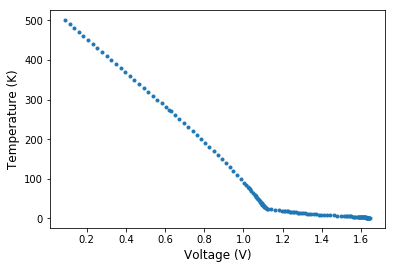

In [7]:
#Plotting the data. This is how temperature depends on voltage.
plt.plot(voltage_sorted,temperature_sorted,".")
plt.xlabel("Voltage (V)",fontsize="large")
plt.ylabel("Temperature (K)",fontsize="large")
plt.show()

In [8]:
#Values for variables in the text file. Setting upt to make a spline interpolation.
x = voltage_sorted
y = temperature_sorted
xx = np.linspace(voltage_sorted[0],voltage_sorted[-1],len(x))

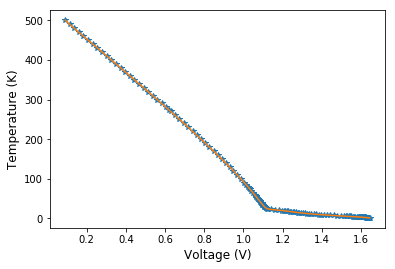

In [9]:
#Using a spline interpolation.
spln = interpolate.splrep(x,y)
yy = interpolate.splev(xx,spln)
plt.clf();
plt.plot(x,y,"*")
plt.plot(xx,yy)
plt.xlabel("Voltage (V)",fontsize="large")
plt.ylabel("Temperature (K)",fontsize="large")
plt.show()

In [10]:
print ("The temperature associated with",random_voltage, " volts is")
print(interpolate.splev(random_voltage,spln))

('The temperature associated with', 0.5212656371163242, ' volts is')
316.59286285274993


In [30]:
#Estimating the error roughly. About 31-36% is the value I have found considering the comparisons between both
# values for the derivative of temperature in function of voltage and the derivative of the spline itself. 
#It is indeed a rough estimate.
firstelementderiv=list(derivative)[1]
firstelementinterpolation=list(np.diff(yy))[1]
print(firstelementinterpolation/firstelementderiv)
lastelementinterpolation=list(np.diff(yy))[-1]
lastelementderiv=list(derivative)[-1]
print(lastelementinterpolation/lastelementderiv)

NameError: name 'derivative' is not defined

In [ ]:
#Comments in the LaTeX file.

### Problem 3

Write a recursive variable step size integrator like the one we
wrote in class that does NOT call f (x) multiple times for the same x. For a
few typical examples, how many function calls do you save vs. the lazy way we
wrote it in class?

In [30]:
import numpy as np
# The funcion I want to integrate. In this case, exp(x).
def yourfunction(x):
    return np.exp(x)
#This is the integrator we used in class.
def class_integrator(func,a,b,tol):
    x = np.linspace(a,b,5)
    y = func(x)
    # Simpson rule for points 0,2,4 (left,middle,right)
    f1 = (((y[0]+4*y[2]+y[4]))*(b-a))/6.0
    # Simpson rule for each point
    f2 = ((y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])*(b-a))/12.0
    # The error according to Simpson rule
    error = np.abs(f2-f1)/15.0
    neval= len(x)
    if error<tol:
        return (16.0*f2-f1)/15.0,error, neval
    else:
        middle_point = (a+b)/2.0
        left_int,error_left,neval_left = class_integrator(func,a,middle_point,tol/2.0)
        right_int,error_right,neval_right = class_integrator(func,middle_point,b,tol/2.0)
        integral = left_int+right_int
        total_error = error_left+error_right
        total_neval = neval+neval_left+neval_right
        return integral, total_error, total_neval

#The new integrator takes into account the points we have already calculated instead of recalculating them again
#For this, we call two other 
def new_integrator(func,a,b,tol,newx=[],newy=[]):
    # The five points with which we begin
    x = np.linspace(a,b,5)
    y = []
    neval = 0
    #For the first-ever evaluation, there will be no values sitting on the list newx[]. Then we can calculate the 
    #integral and add the results to this list.
    if len(newx)==0:
        neval+=5
        for i in range(len(x)):
            newx.append(x[i])
            newy.append(func(x[i]))
            y.append(func(x[i]))
    if len(newx)>0:
    # If this is not the first evaluation, we would like to know wheter we do or not have a value for a given point 
    #i already sitting on the list.
        for i in range(len(x)):
            # If this is true, then we add that to the newx[] list.
            if x[i] in newx:
                y.append(func(x[i]))
            # when this is not true, we will definitely need to call the integrator again.
            else:
                newy.append(func(x[i]))
                newx.append(x[i])
                y.append(func(x[i]))
                neval+=1    
    # Simpson rule for points 0,2,4 (left,middle,right)
    f1 = (((y[0]+4*y[2]+y[4]))*(b-a))/6.0
    # Simpson rule for each point
    f2 = ((y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])*(b-a))/12.0
    # The error according to Simpson rule
    error = np.abs(f2-f1)/15.0
    if error<tol:
        return (16.0*f2-f1)/15.0,error, neval
    else:
        # if the error is large, we want to use the function again
        # but using different points
        middle_point = (a+b)/2.0
        left_int,error_left,neval_left = new_integrator(func,a,middle_point,tol/2.0,newx,newy)
        right_int,error_right,neval_right = new_integrator(func,middle_point,b,tol/2.0,newx,newy)
        integral = left_int+right_int
        total_error = error_left+error_right
        total_neval = neval+neval_left+neval_right
        return integral, total_error, total_neval

integral, error, neval = class_integrator(yourfunction,1,10,1e-10)
print("Integral=",integral,"with",neval,"evaluations, and corresponding error",error)
integral2, error2, neval2 = new_integrator(yourfunction,1,10,1e-10)
print("Integral",integral2, "with",neval2,"evaluations, and corresponding error", error2)   
print ((neval2/neval), "percent advantage")

('Integral=', 22023.747512978258, 'with', 22535, 'evaluations, and corresponding error', 3.6688328301319003e-11)
('Integral', 22023.747512978258, 'with', 9017, 'evaluations, and corresponding error', 3.6688328301319003e-11)
(0, 'percent advantage')


### Problem 4

One can work out the electric field from an infinitessimally
thin spherical shell of charge with radius R by working out the field from a ring
along its central axis, and integrating those rings to form a spherical shell. Use
both your integrator and scipy.integrate.quad to plot the electric field from the
shell as a function of distance from the center of the sphere. Make sure the
range of your plot covers regions with z < R and z > R. Make sure one of your
z values is R. Is there a singularity in the integral? Does quad care? Does your
integrator? Note - if you get stuck setting up the problem, you may be able to
find solutions to Griffiths problem 2.7, which sets up the integral.

In [14]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import random

In [15]:
function = lambda theta: (z-R*np.cos(theta))*np.sin(theta)/((R**2+z**2-2*R*z*np.cos(theta))**(1.5))

In [16]:
R=5
zz = np.linspace(0,10,200)
E_z=[]
error=[]
for i in range (len(zz)):
    z = zz[i]
    E_z = np.append(E_z, integrate.quad(function, 0, np.pi)[0])
    error = np.append(E_z, integrate.quad(function, 0 , np.pi)[1])

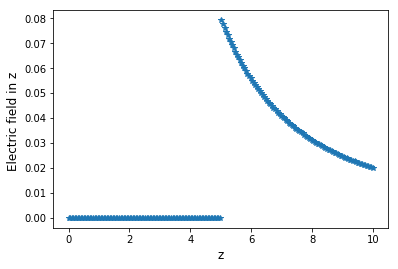

In [17]:
plt.plot(zz, E_z,'*')
plt.xlabel("z",fontsize="large")
plt.ylabel("Electric field in z ",fontsize="large")
plt.show()

In [26]:
#Now we will use a variable step size integrator to integrate the function.

import numpy as np
import sys
sys.setrecursionlimit(20000)

def simple_integrate(a,b,tol,z,R):
    u=np.linspace(a,b,5)
    y=(z-R*u)/(R**2+z**2-2*R*z*u)**(1.5)
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    neval=len(u)
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        f_left,err_left,neval_left=simple_integrate(a,mid,tol,2,3)
        f_right,err_right,neval_right=simple_integrate(mid,b,tol,2,3)
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval
f,err,neval=simple_integrate(-1,1,0.1,2,3)